
=== Optimization Results (Official Model) ===
θ = 28.118419°   (within 0°–50°)
M = 0.021389        (within -0.05–0.05)
X = 54.900089        (within 0–100)
L1 Loss (rubric metric) = 25.24339589
Converged: True, Status: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Recomputed L1 Loss check: 25.24339589 (should match above)


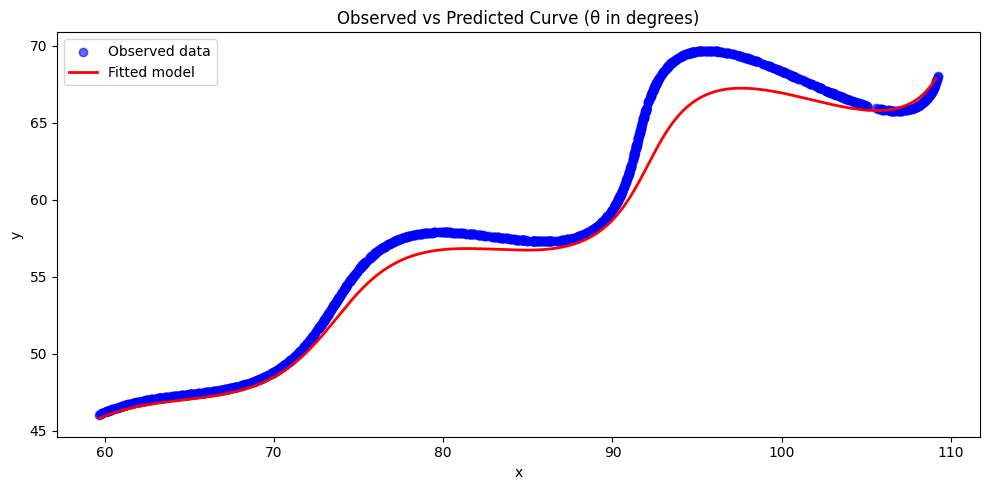

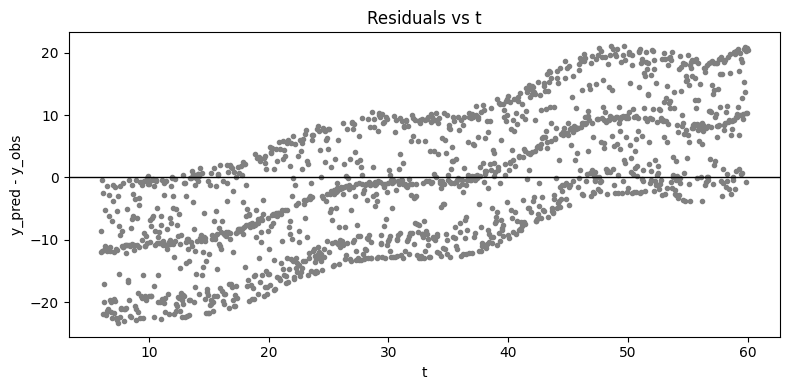


=== Desmos-compatible LaTeX (Final Submission) ===
x(t) = t*cos(0.490759) - e^(0.021389*|t|)*sin(0.3t)*sin(0.490759) + 54.900089
y(t) = 42 + t*sin(0.490759) + e^(0.021389*|t|)*sin(0.3t)*cos(0.490759)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# === Load data ===
df = pd.read_csv("./xy_data.csv")   # Ensure the file is in the same folder
t_data = np.linspace(6, 60, len(df))
x_data = df["x"].values
y_data = df["y"].values

# === Define the official model (as per assignment spec) ===
def model(theta_deg, M, X, t):
    """
    Official assignment model:
        x = t*cos(θ) - e^(M|t|)*sin(0.3t)*sin(θ) + X
        y = 42 + t*sin(θ) + e^(M|t|)*sin(0.3t)*cos(θ)
    θ is in degrees (converted internally to radians).
    """
    theta_rad = np.deg2rad(theta_deg)
    exp_term = np.exp(M * np.abs(t))
    s = np.sin(0.3 * t)
    x = t * np.cos(theta_rad) - exp_term * s * np.sin(theta_rad) + X
    y = 42 + t * np.sin(theta_rad) + exp_term * s * np.cos(theta_rad)
    return x, y

# === Define the L1 metric ===
def L1_loss(params):
    """Mean absolute error (L1) between predicted and observed coordinates."""
    theta_deg, M, X = params
    x_pred, y_pred = model(theta_deg, M, X, t_data)
    # identical L1 distance definition as rubric
    return np.mean(np.abs(x_pred - x_data) + np.abs(y_pred - y_data))

# === Parameter bounds (per problem statement) ===
bounds = [
    (0.0, 50.0),   # θ (degrees)
    (-0.05, 0.05), # M
    (0.0, 100.0)   # X
]

# === Initial guess ===
initial_guess = [25.0, 0.0, 50.0]

# === Reproducibility note ===
# This optimization is deterministic (no random seed dependency).

# === Run constrained L-BFGS-B optimization ===
result = minimize(
    L1_loss,
    x0=initial_guess,
    method="L-BFGS-B",
    bounds=bounds,
    options={"maxiter": 20000, "ftol": 1e-12, "disp": True}
)

# === Extract results ===
theta_opt, M_opt, X_opt = result.x
best_loss = result.fun

print("\n=== Optimization Results (Official Model) ===")
print(f"θ = {theta_opt:.6f}°   (within 0°–50°)")
print(f"M = {M_opt:.6f}        (within -0.05–0.05)")
print(f"X = {X_opt:.6f}        (within 0–100)")
print(f"L1 Loss (rubric metric) = {best_loss:.8f}")
print(f"Converged: {result.success}, Status: {result.message}")

# === Verify reproducibility ===
retest_loss = L1_loss([theta_opt, M_opt, X_opt])
print(f"Recomputed L1 Loss check: {retest_loss:.8f} (should match above)")

# === Plot observed vs predicted ===
x_pred, y_pred = model(theta_opt, M_opt, X_opt, t_data)
plt.figure(figsize=(10,5))
plt.scatter(x_data, y_data, color='blue', alpha=0.6, label='Observed data')
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Fitted model')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Observed vs Predicted Curve (θ in degrees)")
plt.tight_layout()
plt.show()

# === Plot residuals ===
plt.figure(figsize=(8,4))
plt.plot(t_data, y_pred - y_data, '.', color='gray')
plt.axhline(0, color='black', lw=1)
plt.title("Residuals vs t")
plt.xlabel("t")
plt.ylabel("y_pred - y_obs")
plt.tight_layout()
plt.show()

# === Generate Desmos-compatible LaTeX (exact form) ===
theta_rad = np.deg2rad(theta_opt)
latex_str = (
    f"x(t) = t*cos({theta_rad:.6f}) - e^({M_opt:.6f}*|t|)*sin(0.3t)*sin({theta_rad:.6f}) + {X_opt:.6f}\n"
    f"y(t) = 42 + t*sin({theta_rad:.6f}) + e^({M_opt:.6f}*|t|)*sin(0.3t)*cos({theta_rad:.6f})"
)
print("\n=== Desmos-compatible LaTeX (Final Submission) ===")
print(latex_str)

## === Optional save results for report ===
with open("fitted_params.txt", "w", encoding="utf-8") as f:
    f.write("Final Parameters (theta in degrees):\n")
    f.write(f"theta = {theta_opt:.6f}\nM = {M_opt:.6f}\nX = {X_opt:.6f}\n")
    f.write(f"L1 Loss = {best_loss:.8f}\n")
